# <span style=color:red> **Create visualizations using Matplotib, Seaborn and Folium** </span>

## Introduction:

### This project aims to explore and apply various Python data visualization techniques using popular libraries such as Matplotlib, Seaborn, and Folium. Visualization is an essential tool in data science, as it helps uncover patterns and insights from complex datasets.

#### The tasks and techniques presented here are inspired by an IBM Data Science course, which provides a foundational approach to creating effective visual representations of data. However, the content has been further enhanced to deepen the exploration of these libraries, offering a more comprehensive understanding of their capabilities in real-world data analysis. By the end of this project, readers will be able to utilize these tools to create informative and visually compelling plots that aid in better decision-making.


## For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
tting.

### Installing Required Libraries

In [6]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

#### In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
##### recession period 1 - year 1980 <br>
##### recession period 2 - year 1981 to 1982<br>
##### recession period 3 - year 1991<br>
##### recession period 4 - year 2000 to 2001<br>
##### recession period 5 - year end 2007 to mid 2009<br>
##### recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>



## Data Description

### The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

#### The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

## Importing Data

In [17]:
import requests
import pandas as pd
from io import BytesIO

# The URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Make a request to get the data
response = requests.get(url)
# Check if the request was successful
if response.status_code == 200:
    data = BytesIO(response.content)
    df = pd.read_csv(data)
    print('Data downloaded and read into a dataframe!')
    print(df.head())  # Show the first few rows of the dataframe
else:
    print(f"Failed to download data. Status code: {response.status_code}")


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [19]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [21]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis
## TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

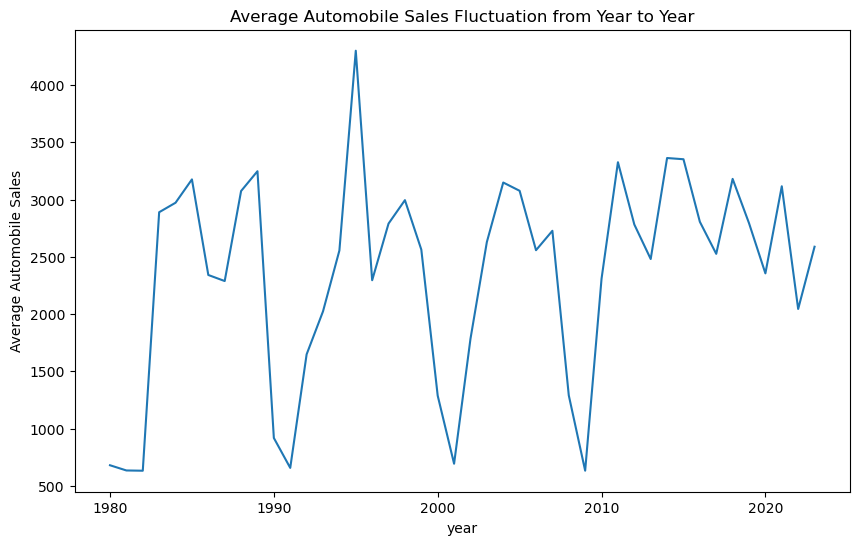

In [28]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Fluctuation from Year to Year')
plt.show()

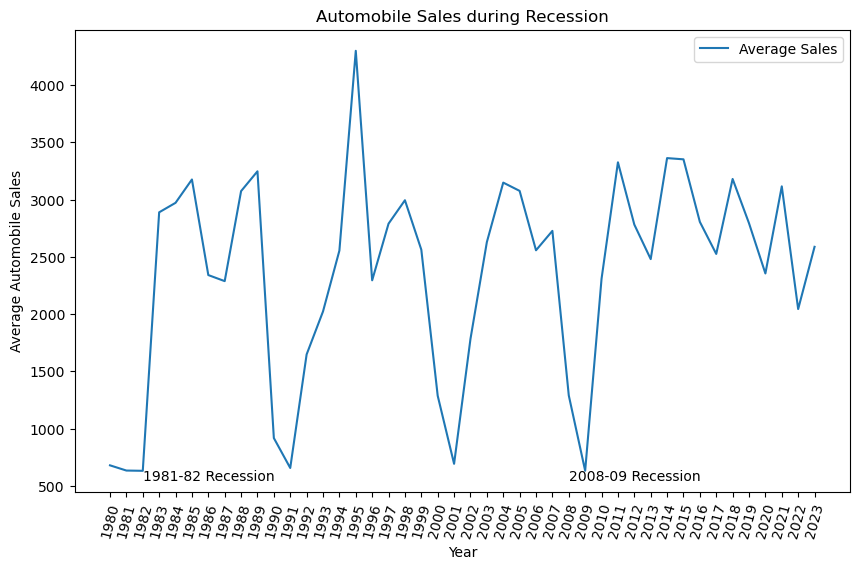

In [36]:
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plot the line chart
df_line.plot(kind='line')

# Set x-ticks with all the years from 1980 to 2023
plt.xticks(list(range(1980, 2024)), rotation=75)  #The rotation=75 part rotates the years on the x-axis (from 1980 to 2023) by 75 degrees.

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Average Automobile Sales')  # Label for the y-axis
plt.title('Automobile Sales during Recession')  # Chart title

# Adding text annotations for recession periods
plt.text(1982, 550, '1981-82 Recession')
plt.text(2008, 550, '2008-09 Recession')

# Adding a legend
plt.legend(['Average Sales'])

# Show the plot
plt.show()

## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

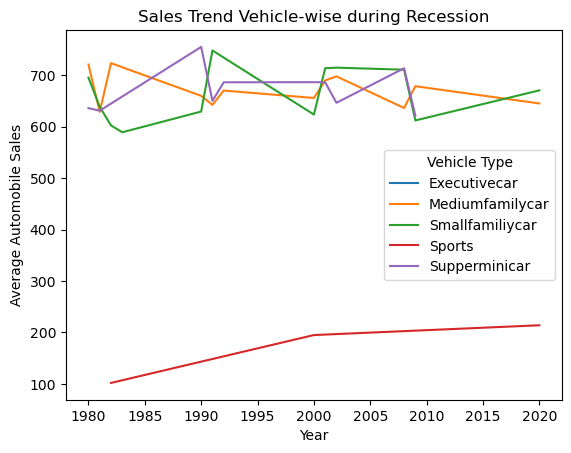

In [39]:
# Filter the data where Recession is 1
#  If the value in the Recession column for a row is 1, the result is True for that row; if the value is something else, the result is False.
df_rec = df[df['Recession'] == 1]  #forming a subset of the original DataFrame.

# Group by Year and Vehicle_Type, and calculate the average automobile sales
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Set Year as the index
df_Mline.set_index('Year', inplace=True)

# Group by Vehicle_Type and plot the sales trend
df_Mline = df_Mline.groupby('Vehicle_Type')['Automobile_Sales']
df_Mline.plot(kind='line')

# Add labels and title to the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Average Automobile Sales')  # Label for the y-axis
plt.title('Sales Trend Vehicle-wise during Recession')  # Title of the chart

# Add a legend
plt.legend(title='Vehicle Type')

# Show the plot
plt.show()


#### Inference: From this plot, we can observe that during recession periods, the sales of 'Sports type vehicles' declined, likely due to their higher cost, making them less affordable during economic downturns. In contrast, the sales of more economical vehicle types, such as superminicars and small family cars, increased, as consumers shifted towards more cost-effective options during financial uncertainty

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

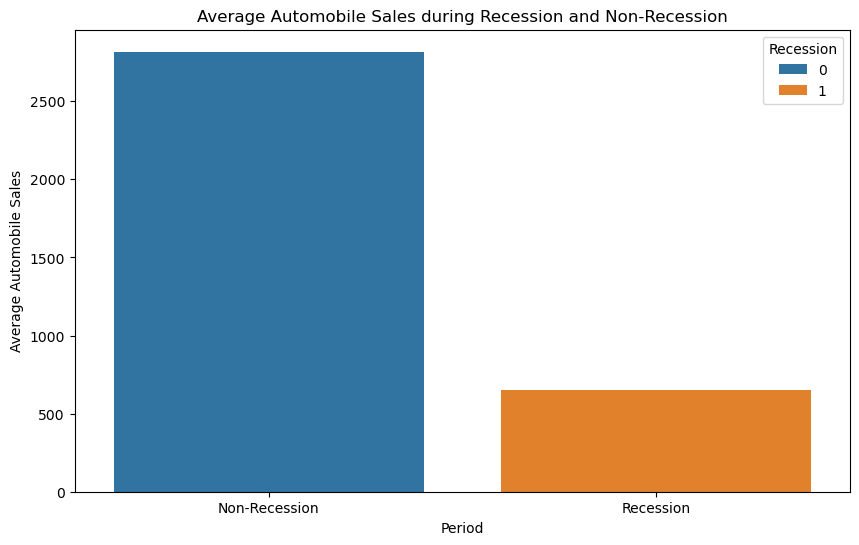

In [43]:
# Group by Recession and calculate the mean of Automobile Sales
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)

# Add labels and title to the plot
plt.xlabel('Period')  # Label for the x-axis
plt.ylabel('Average Automobile Sales')  # Label for the y-axis
plt.title('Average Automobile Sales during Recession and Non-Recession')

# Customize x-ticks labels
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

# Show the plot
plt.show()


### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
#### We recommend that you use the functionality of Seaborn Library to create this visualization

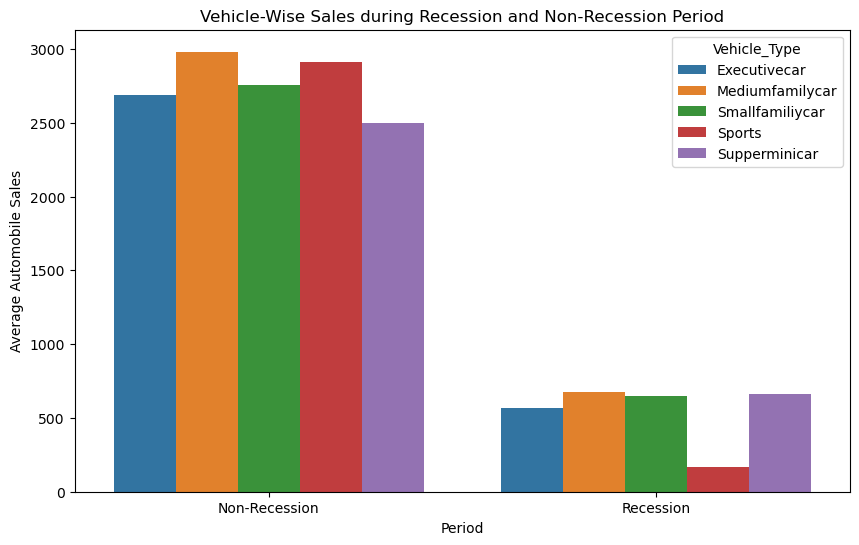

In [49]:
# Filter the data for recessionary and non-recessionary periods
recession_data = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=recession_data)

# Customize the x-ticks, labels, and title
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')  # Label for the x-axis
plt.ylabel('Average Automobile Sales')  # Label for the y-axis
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')  # Title of the chart

# Show the plot
plt.show()


## Insights:
#### From this plot, we can observe a significant decrease in overall automobile sales during recession periods compared to non-recession periods. Among different vehicle types, 'Executive cars' and 'Sports cars' are the most impacted, experiencing the largest declines in sales. This indicates that these vehicle categories are particularly vulnerable to economic downturns, likely due to their higher costs and luxury appeal, which may reduce their affordability and desirability during financial hardships.

## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

#### Now, you want to find more insights from the data to understand the reason. Plot a two line charts using subplotting to answer:-

## How did the GDP vary over time during recession and non-recession periods?

#### Make use of add_subplot() from Matplotlib for this comparision.



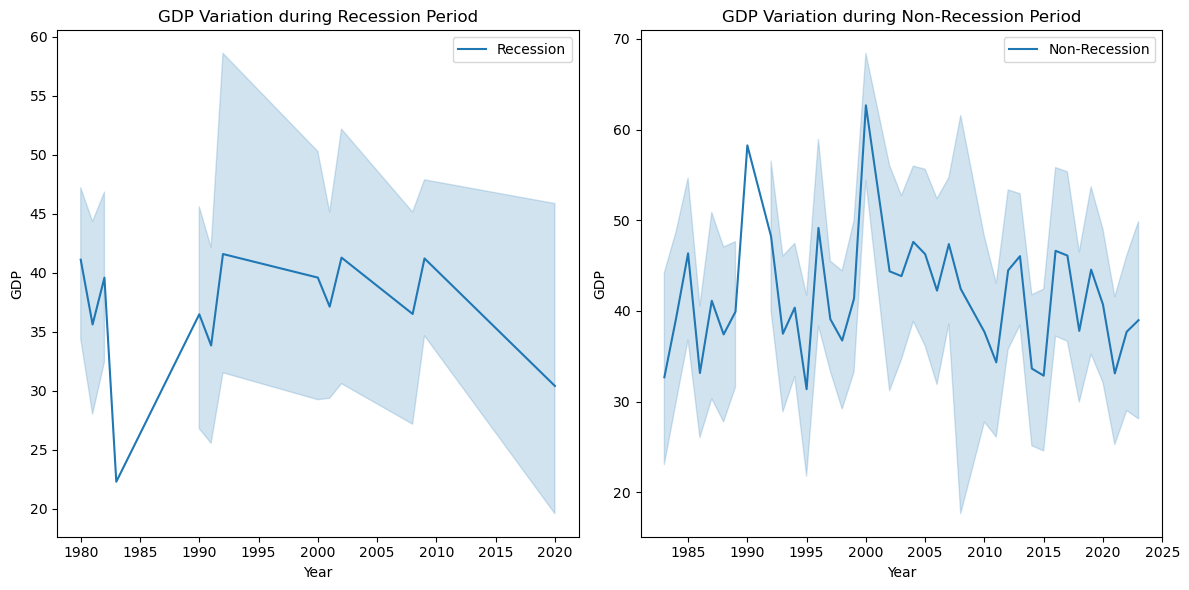

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create a figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # Add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # Add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP variation during the recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot GDP variation during the non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

# Adjust layout
plt.tight_layout()
plt.show()


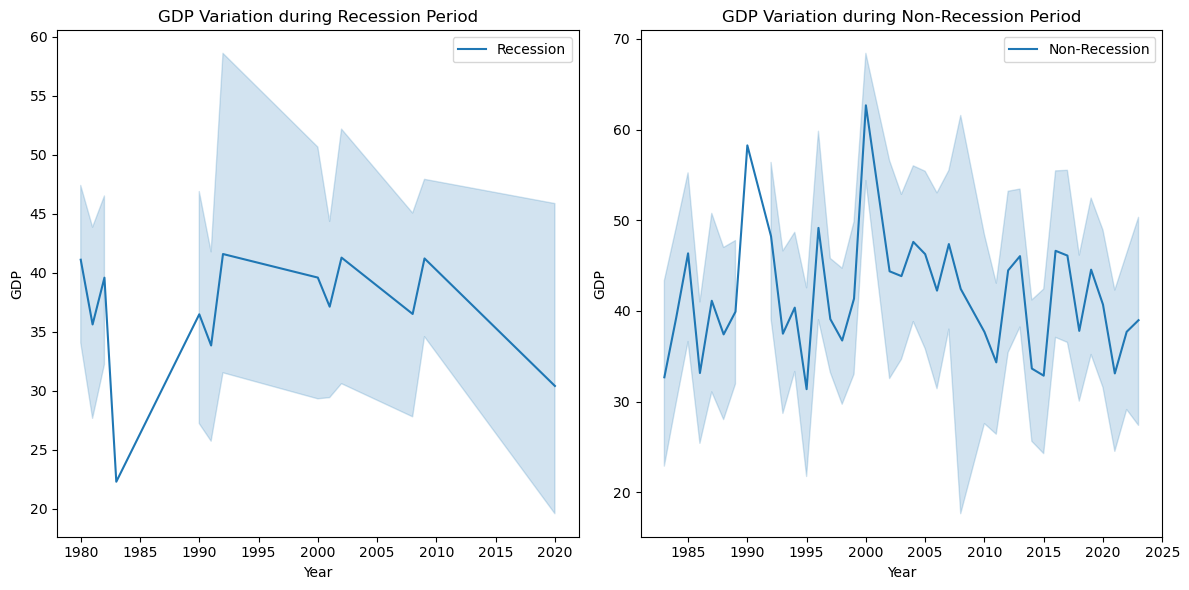

In [56]:
# Using plt.subplot() Method

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create a figure
plt.figure(figsize=(12, 6))

# Subplot 1: GDP variation during recession period
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot 2: GDP variation during non-recession period
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Inference
#### From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

#### How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble Title this plot as 'Seasonality impact on Automobile Sales'

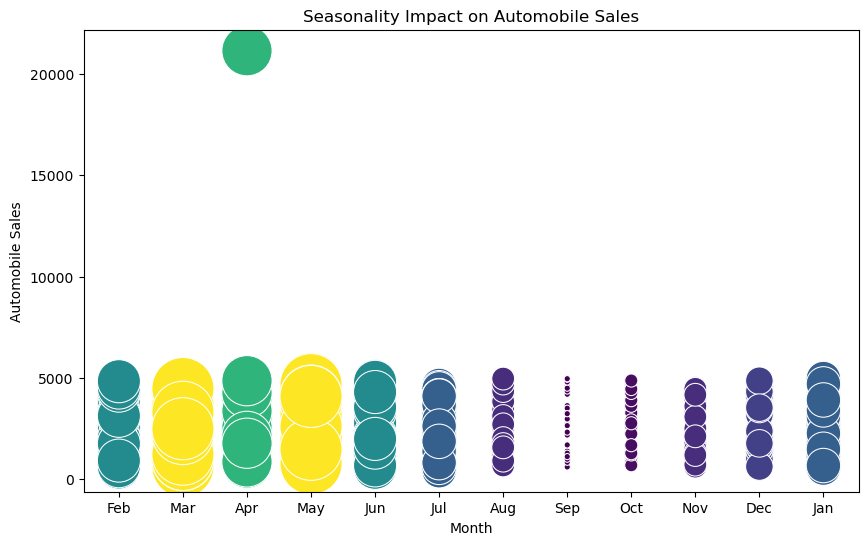

In [62]:
# Filter data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Define the size of the bubbles based on the Seasonality Weight
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, sizes=(20, 2000), legend=False, hue='Seasonality_Weight', palette='viridis')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show the plot
plt.show()

## Inference
#### From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April. Peak Months: April and May appear to be the months with the highest sales. Campaigns conducted during these months, new model launches, or changes in consumer behavior could explain this situation.
#### Decline Months: A significant drop in sales is observed in August and September. This situation could be related to the end of summer vacations, the start of school, and changes in consumer spending habits.

## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

#### Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

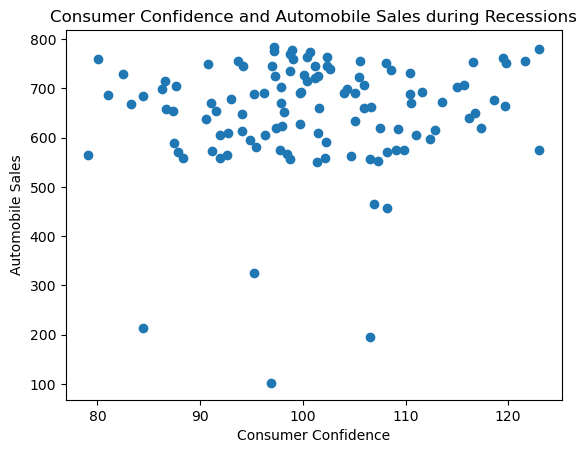

In [70]:
# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Consumer Confidence')  # X-axis label
plt.ylabel('Automobile Sales')      # Y-axis label
plt.title('Consumer Confidence and Automobile Sales during Recessions')  # Plot title

# Display the plot
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?
#### Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

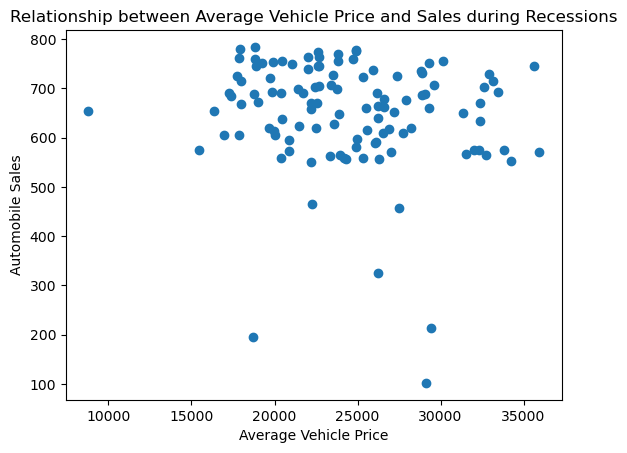

In [73]:
# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Average Vehicle Price')  # X-axis label
plt.ylabel('Automobile Sales')       # Y-axis label
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')  # Plot title

# Display the plot
plt.show()

## Inference
#### There is not much relation!

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

### How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?


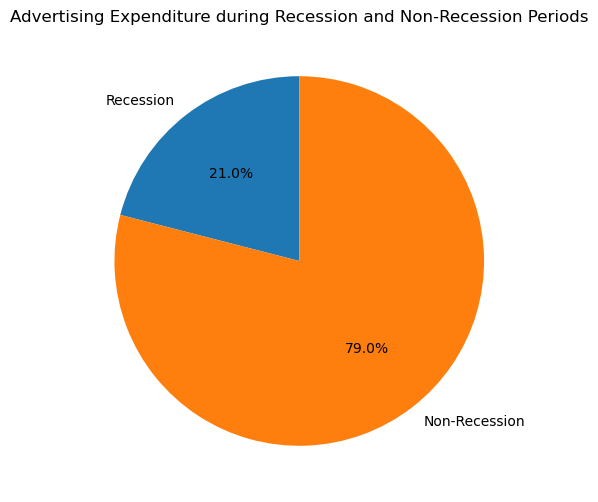

In [77]:
# Filter the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Prepare data for the pie chart
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Display the plot
plt.show()

### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?



## Inference
#### It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!



## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
### Can we observe the share of each vehicle type in total expenditure during recessions?

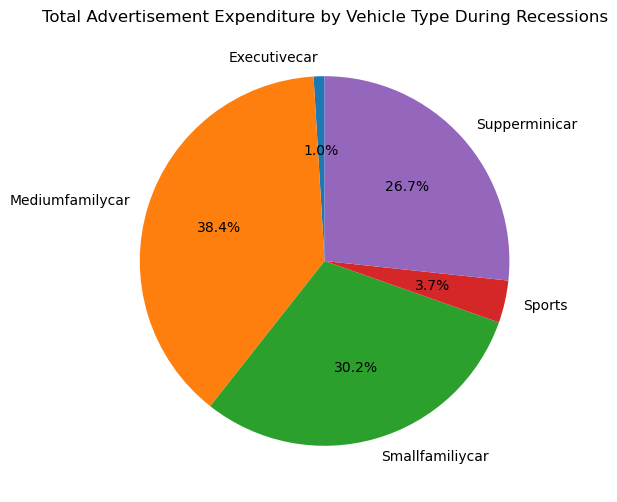

In [82]:
# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the total advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))  # Adjust the size of the figure if needed

# Pie chart parameters
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Total Advertisement Expenditure by Vehicle Type During Recessions')

# Display the plot
plt.show()

## Inference
#### During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


## TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
#### Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


In [88]:
print(df_rec.columns)


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


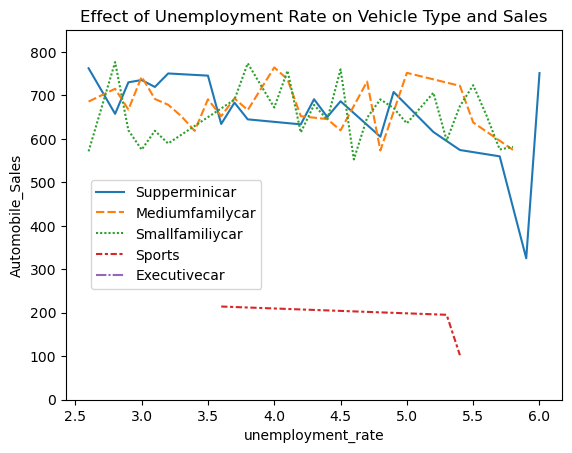

In [94]:

# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Create a line plot with default markers
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', err_style=None)

# Set y-axis limits
plt.ylim(0, 850)

# Adjust legend location
plt.legend(loc=(0.05, 0.3))

# Add title
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Display the plot
plt.show()


## Inference
#### During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar. Impact of Unemployment:
#### Direct Correlation: The plot might reveal a direct correlation between higher unemployment rates and the increased sales of more economical vehicle types. As unemployment rises, purchasing power decreases, leading to a preference for more budget-friendly options.



## Conclusion:

#### In conclusion, this project successfully demonstrates how data visualization can be leveraged to gain insights and communicate findings in a clear and impactful way. Using Matplotlib and Seaborn for static plots, and Folium for interactive geographical visualizations, we explored various techniques to represent data visually.

#### By enhancing the core examples from IBM’s course with additional customizations and analysis, we provided a more thorough understanding of how these tools can be utilized in practice. This project serves as a solid foundation for further exploration into data visualization and analysis using Python.